In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
fifa= pd.read_csv('fifa21_stats.csv')
fifa.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  ...  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png  ...   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png  ...   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png  ...   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png  ...   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png  ...   

     CDM    RDM    RWB     LB   LCB    CB   RCB     RB    GK Gender  
0  70+-1  70+-1  71+-2  70+-1  69+0  69+0  69+0  70+-1  17+0   Male  
1   66+1   66+1   62+1   60+1  60+1  60+1  60+1   60+1  17+1   Male  
2   54+0   54+0   52+0   47+0  46+0  46+0  46+0   47+0  15+0   Male  
3   65+0   65+0   56+0   57+0  51+0  51+0  51+0   57+0  22+0   Male  
4   73+3   73+3   70+3   67+3  64+3  64+3  64+3   67+3  17+3   Male  

[5 rows x 107 columns]

In [3]:
fifa.shape

(17125, 107)

In [4]:
len(fifa)

17125

In [5]:
fifa.columns.tolist()

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [6]:
nacionalidades=fifa.Nationality.value_counts().head(10)
nacionalidades

England          1707
Germany          1154
Spain            1121
France            990
Brazil            857
Argentina         778
Italy             565
Netherlands       475
Portugal          365
United States     358
Name: Nationality, dtype: int64

In [7]:
fifa.Position.value_counts()

CB            2047
ST            1818
GK            1517
CDM CM         748
LB             654
              ... 
CDM LB CM        1
LW ST CAM        1
IVST RM CF       1
ST LW RM         1
LB LM CDM        1
Name: Position, Length: 622, dtype: int64

# Matplotlib

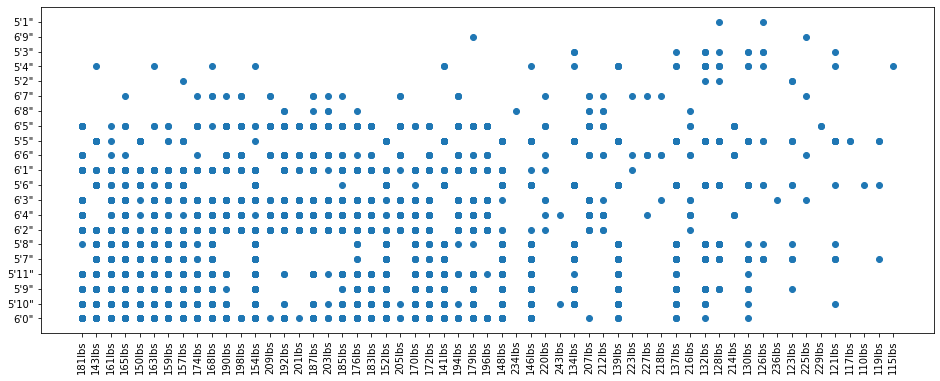

In [8]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16,6))
# Dibujar puntos

ax.scatter(x= fifa['Weight'] , y = fifa['Height'])
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este grafico hicimos una grafico de dispersion de altura y peso

In [9]:
ax = nacionalidades.plot(kind = 'bar',width=0.8,subplots=True,figsize=(9,4.5))

Este grafico nos permite visualizar el top 10 de lo paises con mayor cantidad de jugadores 

In [10]:
piehabil=fifa.foot.value_counts()
piehabil



Right    12906
Left      4219
Name: foot, dtype: int64

In [11]:
fig, ax = plt.subplots(figsize=(3,3))

desfase = (0,0.1)
colores = ["#60D394","#EE6055"]
ax = plt.pie(piehabil, autopct=('%0.2f%%'), colors=colores, explode=desfase)

plt.show()


##desfase = (0,0.1)

##databtc.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'), colors=colores, explode=desfase)

En el grafico superior se puede ver a simple vista el porcentaje de judadores que su pierna mas habil es la derecha vs los jugadores que su pierna mas habil es la izquierda

In [12]:
df = fifa.groupby(['foot'])['ID'].count()
df

foot
Left      4219
Right    12906
Name: ID, dtype: int64

In [13]:
df2 = fifa.groupby(['foot'])['ID'].count().reset_index().sort_values(by='foot', ascending=False)
df2

foot     ID
1  Right  12906
0   Left   4219

# Seaborn

In [14]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=fifa, x='Weight', y='Height', hue='Position', style='Position')

<AxesSubplot:xlabel='Weight', ylabel='Height'>

Este grafico vuelve a mostrarnos la dispersion de peso y altura. Ademas de utilizar otra libreria tambien se sumo a esa dispersión la posición en la que juega cada jugador para poder comprobar si hay algun patrón a seguir segun su ubicacion en el campo de juego.

In [15]:
nombre = fifa['Name']
nombre

0            G. Pasquale
1            Luis García
2                J. Cole
3               D. Yorke
4                Iniesta
              ...       
17120         A. Medioub
17121         W. Rickard
17122         C. Barrett
17123     J. Gazibegović
17124    Pablo Rodríguez
Name: Name, Length: 17125, dtype: object

In [16]:
res = fifa[['Total Stats', 'Name']].head(15).sort_values('Total Stats',ascending=False)
res

Total Stats           Name
9          2065     P. Scholes
6          2017   E. Belözoğlu
4          2014        Iniesta
11         2012     D. Beckham
12         1974       R. Keane
7          1939       R. Giggs
0          1929    G. Pasquale
1          1906    Luis García
10         1868     P. Neville
8          1774  G. Neville  B
2          1770        J. Cole
5          1649     D. Odonkor
13         1581    S. Campbell
3          1348       D. Yorke
14         1196        O. Kahn

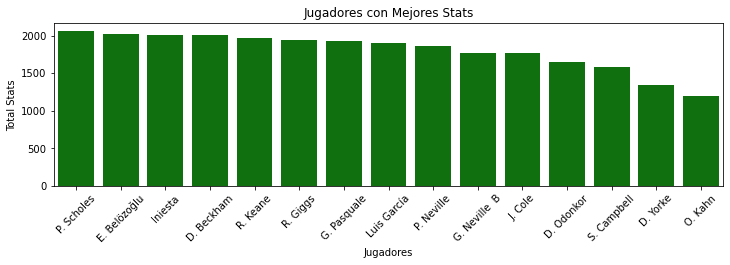

In [17]:
plt.figure(figsize=(12,3))
ax = sns.barplot(x = 'Name', y = 'Total Stats', data = res, color = 'green')

ax.set_xlabel('Jugadores')
ax.set_title('Jugadores con Mejores Stats')
plt.xticks(rotation=45)

plt.show()

En el grafico superior se ve el top 15 de los jugadores con mayores Stadisticas.

In [18]:
cr= fifa['Name'] == 'Cristiano Ronaldo' 
cr2= fifa[cr]
print (cr2)


lm= fifa['Name'] == 'L. Messi' 
lm2= fifa[lm]
lm2

        ID               Name  Age  OVA Nationality      Club  BOV  BP  \
142  20801  Cristiano Ronaldo   35   92    Portugal  Juventus   92  ST   

    Position                                       Player Photo  ...   CDM  \
142    ST LW  https://cdn.sofifa.com/players/020/801/20_120.png  ...  61+3   

      RDM   RWB    LB   LCB    CB   RCB    RB    GK Gender  
142  61+3  65+3  61+3  54+3  54+3  54+3  61+3  20+3   Male  

[1 rows x 107 columns]


ID      Name  Age  OVA Nationality          Club  BOV  BP  Position  \
752  158023  L. Messi   33   93   Argentina  FC Barcelona   93  RW  RW ST CF   

                                          Player Photo  ...   CDM   RDM   RWB  \
752  https://cdn.sofifa.com/players/158/023/20_120.png  ...  65+3  65+3  66+3   

       LB   LCB    CB   RCB    RB    GK Gender  
752  62+3  52+3  52+3  52+3  62+3  19+3   Male  

[1 rows x 107 columns]

In [19]:
cr7 = fifa[fifa.Name.isin(['Cristiano Ronaldo'])]
ms = fifa[fifa.Name.isin(['L. Messi'])]

print (cr7)
ms

        ID               Name  Age  OVA Nationality      Club  BOV  BP  \
142  20801  Cristiano Ronaldo   35   92    Portugal  Juventus   92  ST   

    Position                                       Player Photo  ...   CDM  \
142    ST LW  https://cdn.sofifa.com/players/020/801/20_120.png  ...  61+3   

      RDM   RWB    LB   LCB    CB   RCB    RB    GK Gender  
142  61+3  65+3  61+3  54+3  54+3  54+3  61+3  20+3   Male  

[1 rows x 107 columns]


ID      Name  Age  OVA Nationality          Club  BOV  BP  Position  \
752  158023  L. Messi   33   93   Argentina  FC Barcelona   93  RW  RW ST CF   

                                          Player Photo  ...   CDM   RDM   RWB  \
752  https://cdn.sofifa.com/players/158/023/20_120.png  ...  65+3  65+3  66+3   

       LB   LCB    CB   RCB    RB    GK Gender  
752  62+3  52+3  52+3  52+3  62+3  19+3   Male  

[1 rows x 107 columns]

In [20]:
categories = ['Attacking','Crossing', 'Dribbling', 'Vision','Skill','Shot Power','Attacking']

cr7 = [92,100,80,75,92,95,92]
messi = [95,90,89,91,93,91,95]

#cr72= cr7['Attacking'],cr7['Crossing'], 'Dribbling', 'Vision','Skill','Shot Power','Attacking']
#messi2= messi['Attacking','Crossing', 'Dribbling', 'Vision','Skill','Shot Power','Attacking']

label_loc = np.linspace(start=0, stop=2* np.pi, num=len(cr7))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
plt.plot(label_loc, cr7,label='CR7')
plt.plot(label_loc, messi,label='Messi')

plt.title('Messi vs CR7', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

Es una comparacion entre Cristiano Ronaldo y Messi teniendo en cuenta algunas habilidades en particular (el tipico Grafico de videojuego. No supimos como tomar los valores del dataset real y se escribieron a mano.)

In [21]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=cr7, theta=categories, fill='toself', name='CR7'),
        go.Scatterpolar(r=messi, theta=categories, fill='toself', name='L. Messi')],
    layout=go.Layout(
        title=go.layout.Title(text='Messi vs CR7'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True))
fig

El mismo grafico que el anterior. Comparando CR7 y MEssi. Usando otra libreria.

In [22]:
df2 = fifa.groupby(['foot'])['ID'].count().reset_index().sort_values(by='foot', ascending=False)


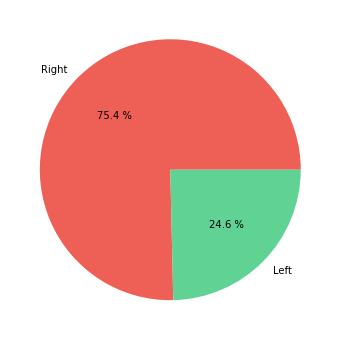

In [23]:
colores = ["#EE6055","#60D394"]
plt.figure(figsize=(6,6))
plt.pie(df2['ID'], labels=df2['foot'],autopct="%0.1f %%",colors=colores)

plt.title = ('% Pierna Habil')

plt.show()

Volvimos a repetir el grafico de porcentaje de jugadores con su pierna mas hábil. En este pudimos poner las leyendas para que sea mas claro al leerlo.

In [24]:
fifa_s=fifa['Crossing']
fifa_s

0        75
1        68
2        80
3        54
4        75
         ..
17120    35
17121    50
17122    55
17123    62
17124    32
Name: Crossing, Length: 17125, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='OVA'>

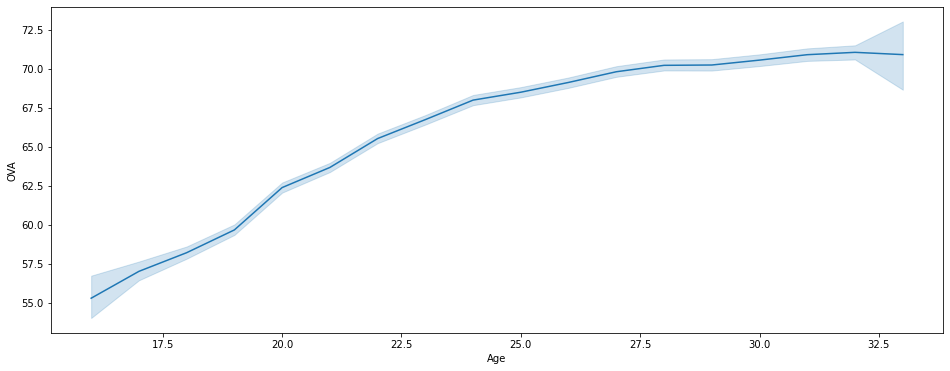

In [25]:
fifa_sort_age = fifa.sort_values('Age')
fifa_age_vs_OVA = fifa_sort_age.loc[:2,['Age', 'OVA']]

plt.figure(figsize=(16,6))
sns.lineplot(data=fifa_age_vs_OVA , x="Age", y="OVA")



Aca hicimos un grafico donde se ve la edad y la valoración según el recuento de sus habilidades (número promedio)

# HIPOTESIS ENTREGA N°3

In [26]:
# ¿Los jugadores de mayor altura tendran una mejor precisión a la hora de cabecear? 
# ¿y los de menor altura tendrán ménos precisión??

In [27]:
prec_Cabezazo = fifa[['Height', 'Heading Accuracy']].sort_values('Height',ascending=False)
prec_Cabezazo

Height  Heading Accuracy
14217   6'9"                12
3483    6'9"                18
12150   6'8"                53
1582    6'8"                84
3443    6'8"                78
...      ...               ...
8098   5'10"                58
8096   5'10"                61
8094   5'10"                77
9617    5'1"                38
11004   5'1"                47

[17125 rows x 2 columns]

In [28]:
prec_Cabezazo.head(15)

Height  Heading Accuracy
14217   6'9"                12
3483    6'9"                18
12150   6'8"                53
1582    6'8"                84
3443    6'8"                78
7733    6'8"                12
125     6'8"                86
7778    6'8"                72
10730   6'8"                13
1013    6'8"                71
2824    6'8"                16
6248    6'8"                13
10710   6'8"                68
12759   6'8"                10
4244    6'7"                11

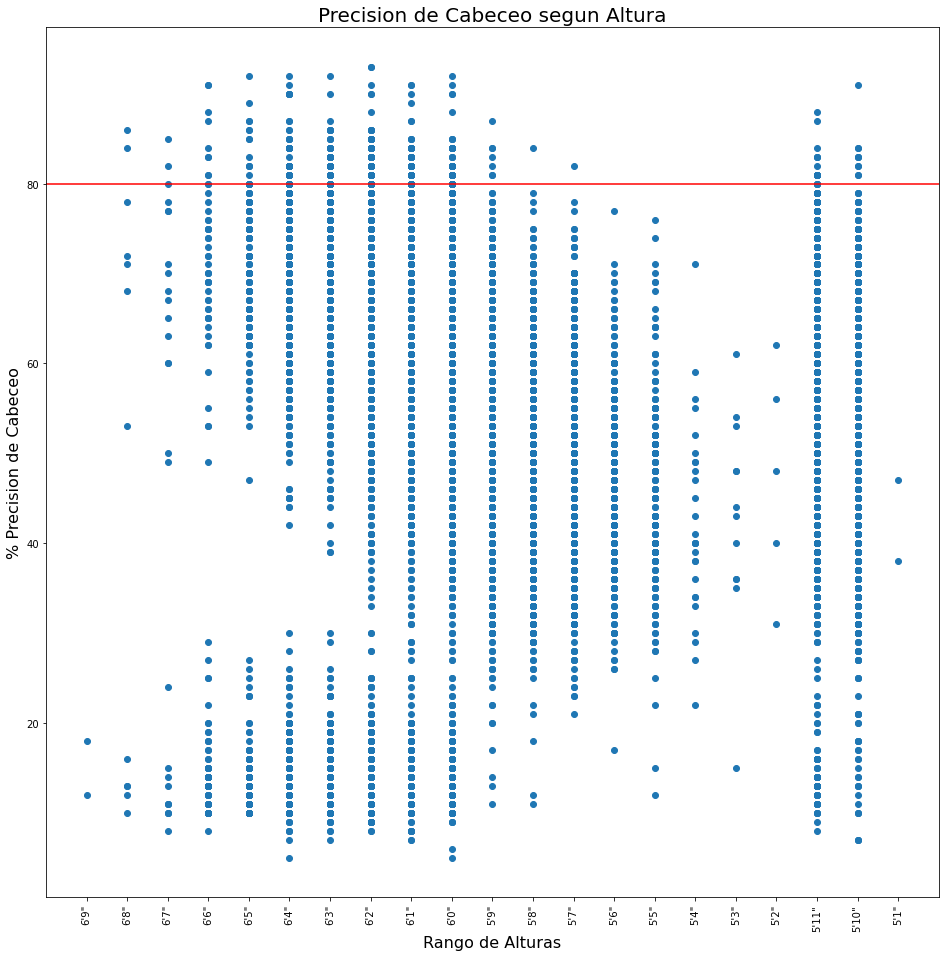

In [29]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16,16))

# Dibujar puntos
ax.scatter(x = prec_Cabezazo['Height'] , y = prec_Cabezazo['Heading Accuracy'])
plt.xticks(rotation=90)
plt.axhline(y=80, xmin=0, xmax=1, c='red')

ax.set_title('Precision de Cabeceo segun Altura', fontsize=20)
ax.set_xlabel('Rango de Alturas', fontsize=16)
ax.set_ylabel('% Precision de Cabeceo', fontsize=16)



# Mostrar el gráfico
plt.show()

In [30]:
fifa.Nationality.unique()

array(['Italy', 'Spain', 'England', 'Trinidad &amp; Tobago', 'Germany',
       'Turkey', 'Wales', 'Republic of Ireland', 'Nigeria', 'Brazil',
       'Australia', 'Hungary', 'Argentina', 'Portugal', 'Netherlands',
       'France', 'Norway', 'Tunisia', 'Bulgaria', 'Poland',
       'United States', 'Mali', 'Finland', 'Iceland', 'Czech Republic',
       'Serbia', 'Sweden', 'Georgia', 'Denmark', 'Senegal', 'Israel',
       'Cameroon', 'Greece', 'Scotland', 'Ukraine', 'China PR',
       'Colombia', 'Belgium', 'Ivory Coast', 'Switzerland', 'Canada',
       'Chile', 'Peru', 'Paraguay', 'Mexico', 'Japan', 'Ghana',
       'Korea Republic', 'Belarus', 'Egypt', 'Congo', 'Uruguay',
       'South Africa', 'Northern Ireland', 'Togo', 'Jamaica', 'Austria',
       'Algeria', 'Morocco', 'Albania', 'North Macedonia', 'Slovenia',
       'Madagascar', 'Croatia', 'Kosovo', 'Estonia', 'Moldova',
       'Bosnia Herzegovina', 'Russia', 'Romania', 'DR Congo',
       'Antigua &amp; Barbuda', 'Burkina Faso', 'Pan

In [31]:
fifa['continente'] = np.where(fifa.Nationality.isin(['Spain', 'Italy', 'France', 'Germany', 'England',
                                                                    'Poland','Switzerland','Netherlands','Albania','Belgium','Turkey',
                                                    'Russia','Greece','Hungary','Morocco','Serbia','Sweden','Croatia']), 'Europe','Rest_World')

In [32]:
fifa.Club.unique()

array(['Udinese', 'KAS Eupen', 'Coventry City', 'Sunderland',
       'Vissel Kobe', 'Alemannia Aachen', 'Fenerbahçe SK',
       'Manchester United', 'Everton', nan, 'LA Galaxy',
       'Newcastle United', 'FC Bayern München', 'Milton Keynes Dons',
       'Hull City', 'Pohang Steelers', 'Leicester City', 'VfB Stuttgart',
       'Hungary', 'FC Anzhi Makhachkala', 'Inter', 'Sydney FC',
       'Montreal Impact', 'Milan', 'Juventus', 'Parma',
       'CF Estrela da Amadora', 'Roma', 'Botafogo', 'Manchester City',
       'FC Barcelona', 'Paris Saint-Germain', 'Ipswich Town', 'Ajax',
       'Borussia Dortmund', 'Bolton Wanderers', 'SL Benfica',
       'Stoke City', 'Newport County', 'Burton Albion', 'Aston Villa',
       'Rio Ave FC', 'New York Red Bulls', 'SD Ponferradina', 'Reading',
       'Portugal', 'Bayer 04 Leverkusen', 'Internacional', 'RCD Espanyol',
       'Cracovia', 'FC Sion', 'Lecce', 'Stade Brestois 29',
       'Doncaster Rovers', 'Liverpool', 'New York City FC', 'FC Porto',
    

In [33]:
fifa['Champions_league'] = np.where(fifa.Club.isin(['Paris Saint-Germain', 'Ajax', 'Atlético Madrid', 'FC Barcelona B', 'FC Bayern München',
                                                                    'SL Benfica','Celtic','Chelsea','Club Brugge KV','Dinamo Zagreb','Borussia Dortmund','Eintracht Frankfurt',
                                                    'Inter','Juventus','RB Leipzig','Bayer 04 Leverkusen','Liverpool','Manchester City','Olympique de Marseille','Milan',
                                                    'Napoli','Viktoria Plzeň','FC Porto','Rangers FC','Real Madrid','FC Red Bull Salzburg','Sevilla FC','Shakhtar Donetsk','Sporting CP','Tottenham Hotspur','FC København']), 'Si','No')

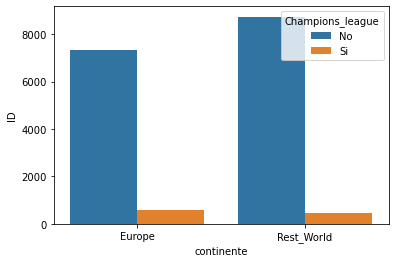

In [34]:
##Pregunta: Los jugadores de la champions league son mayormente europeos? 
sns.barplot(x = 'continente',
            y = 'ID',
            hue = 'Champions_league', estimator = len,
            data = fifa)
 
# Show the plot
plt.show()


# Filtrado de columnas

Para definir las variables a utilizar, dividimos entra Jugadores y Arqueros, ya que poseen distintos datos de interés. 

# Jugadores

In [36]:
fifa_jug = fifa [['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Position',
 'Club',
 'Height',
 'Weight',
 'foot',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Total Stats']]

jugadores = fifa_jug[(fifa_jug ["Position"] != "GK")]
jugadores.sort_values (by = ["OVA"], inplace=True, ascending = False)



In [37]:
mask_std = jugadores.OVA < 65
jugadores.loc[mask_std,['target']] = 'bronce'

mask_std = jugadores.OVA > 64
jugadores.loc[mask_std,['target']] = 'plata'

mask_std = jugadores.OVA > 74
jugadores.loc[mask_std,['target']] = 'oro'

jugadores.head()

ID               Name  Age  OVA Nationality  Position  \
752   158023           L. Messi   33   93   Argentina  RW ST CF   
142    20801  Cristiano Ronaldo   35   92    Portugal     ST LW   
2871  192985       K. De Bruyne   29   91     Belgium    CAM CM   
2650  190871          Neymar Jr   28   91      Brazil    LW CAM   
2287  188545     R. Lewandowski   31   91      Poland        ST   

                     Club Height  Weight   foot  ...  Positioning  Vision  \
752          FC Barcelona   5'7"  159lbs   Left  ...         93.0    95.0   
142              Juventus   6'2"  183lbs  Right  ...         95.0    82.0   
2871      Manchester City  5'11"  154lbs  Right  ...         88.0    94.0   
2650  Paris Saint-Germain   5'9"  150lbs  Right  ...         87.0    90.0   
2287    FC Bayern München   6'0"  176lbs  Right  ...         94.0    79.0   

      Penalties  Composure  Defending  Marking  Standing Tackle  \
752          75       96.0         91       32               35   
142          84       95.0         84       28               32   
2871         84       91.0        186       68               65   
2650         92       93.0         94       35               30   
2287         88       88.0         96       35               42   

      Sliding Tackle  Total Stats  target  
752             24.0         2231     oro  
142             24.0         2221     oro  
2871            53.0         2304     oro  
2650            29.0         2175     oro  
2287            19.0         2195     oro  

[5 rows x 47 columns]

# Arqueros

In [38]:
arq = fifa [['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Position',
 'Club',
 'Height',
 'Weight',
 'foot',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes']]

arqueros = arq[(arq ["Position"] == "GK")]
arqueros.sort_values (by = ["OVA"], inplace=True, ascending = False)


In [39]:
mask_std = arqueros.OVA < 65
arqueros.loc[mask_std,['target']] = 'bronce'

mask_std = arqueros.OVA > 64
arqueros.loc[mask_std,['target']] = 'plata'

mask_std = arqueros.OVA > 74
arqueros.loc[mask_std,['target']] = 'oro'

arqueros.head()

ID           Name  Age  OVA Nationality Position               Club  \
3665  200389       J. Oblak   27   91    Slovenia       GK    Atlético Madrid   
2790  192448  M. ter Stegen   28   90     Germany       GK       FC Barcelona   
5777  212831        Alisson   27   90      Brazil       GK          Liverpool   
1010  167495       M. Neuer   34   89     Germany       GK  FC Bayern München   
2745  192119    T. Courtois   28   89     Belgium       GK        Real Madrid   

     Height  Weight   foot  Goalkeeping  GK Diving  GK Handling  GK Kicking  \
3665   6'2"  192lbs  Right          437         87           92          78   
2790   6'2"  187lbs  Right          439         88           85          88   
5777   6'3"  201lbs  Right          439         86           88          85   
1010   6'4"  203lbs  Right          440         87           87          91   
2745   6'6"  212lbs   Left          420         84           89          74   

      GK Positioning  GK Reflexes target  
3665              90           90    oro  
2790              88           90    oro  
5777              91           89    oro  
1010              86           89    oro  
2745              85           88    oro

 Nuestro modelo va a ser un modelo de clasificación. Como habla de un videojuego de futbol cada jugador tiene un
 valor que puede ser Oro, Plata o Bronce.
 
 La clasificación es en base al campo OVA el cual resume todas las calificaciones del jugador en un solo número, es decir que
 esta será nuestra variable Target.
 
 Expectativas sobre el modelo: En base a ese número sale nuestra calificación si es 75 o mayor es Oro, si esta entre 65 y 74 es plata y si es menor a 65 es Bronce.
 

# Borrado de Duplicados

In [40]:
print(jugadores.shape)
train= jugadores.drop_duplicates()
print(jugadores.shape)

(15608, 47)
(15608, 47)


# Analisis de nulos

In [41]:
jugadores.isnull().sum()

ID                    0
Name                  0
Age                   0
OVA                   0
Nationality           0
Position            413
Club                 20
Height                0
Weight                0
foot                  0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              55
Skill                 0
Dribbling             0
Curve                55
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              55
Reactions             0
Balance              55
Power                 0
Shot Power            0
Jumping              55
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         5
Positioning           5
Vision               55
Penalties             0
Composure           402
Defending       

In [42]:
jugadores.shape[0]

15608

In [43]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', 1000 )  # or 1000
serie=(jugadores.isnull().sum()/jugadores.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Position          2.646079
Composure         2.575602
Agility           0.352383
Vision            0.352383
Balance           0.352383
Sliding Tackle    0.352383
Jumping           0.352383
Curve             0.352383
Volleys           0.352383
Club              0.128139
Positioning       0.032035
Interceptions     0.032035
dtype: float64

<AxesSubplot:>

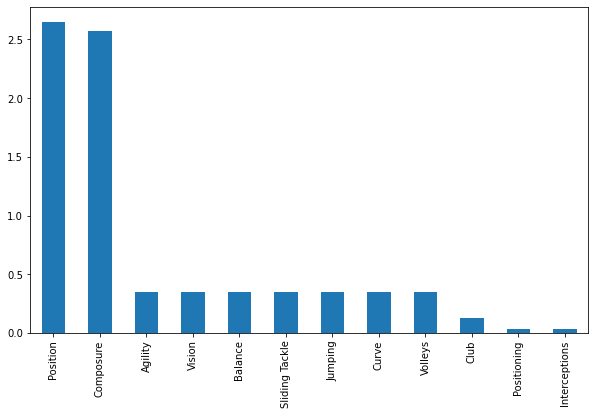

In [44]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [45]:
!pip install missingno 

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:>

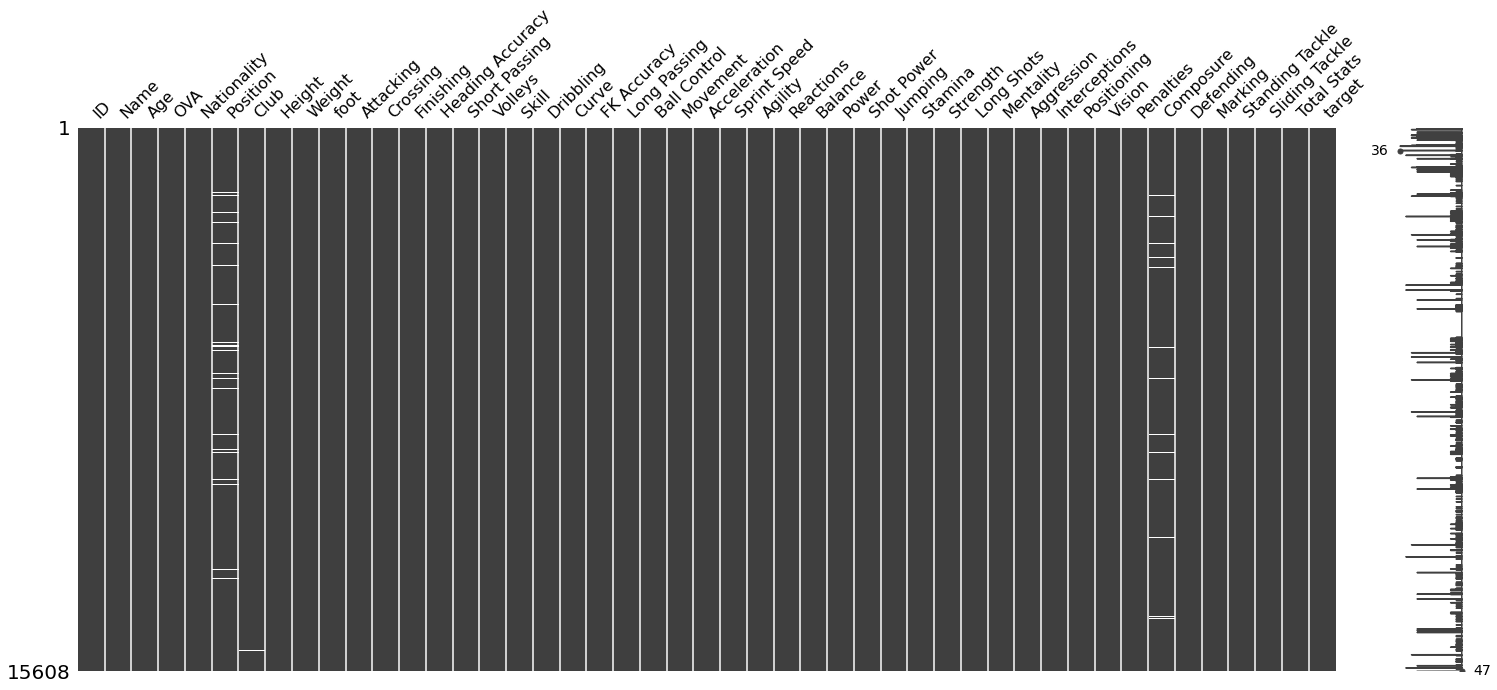

In [46]:
import missingno as msno
msno.matrix(jugadores)

<AxesSubplot:>

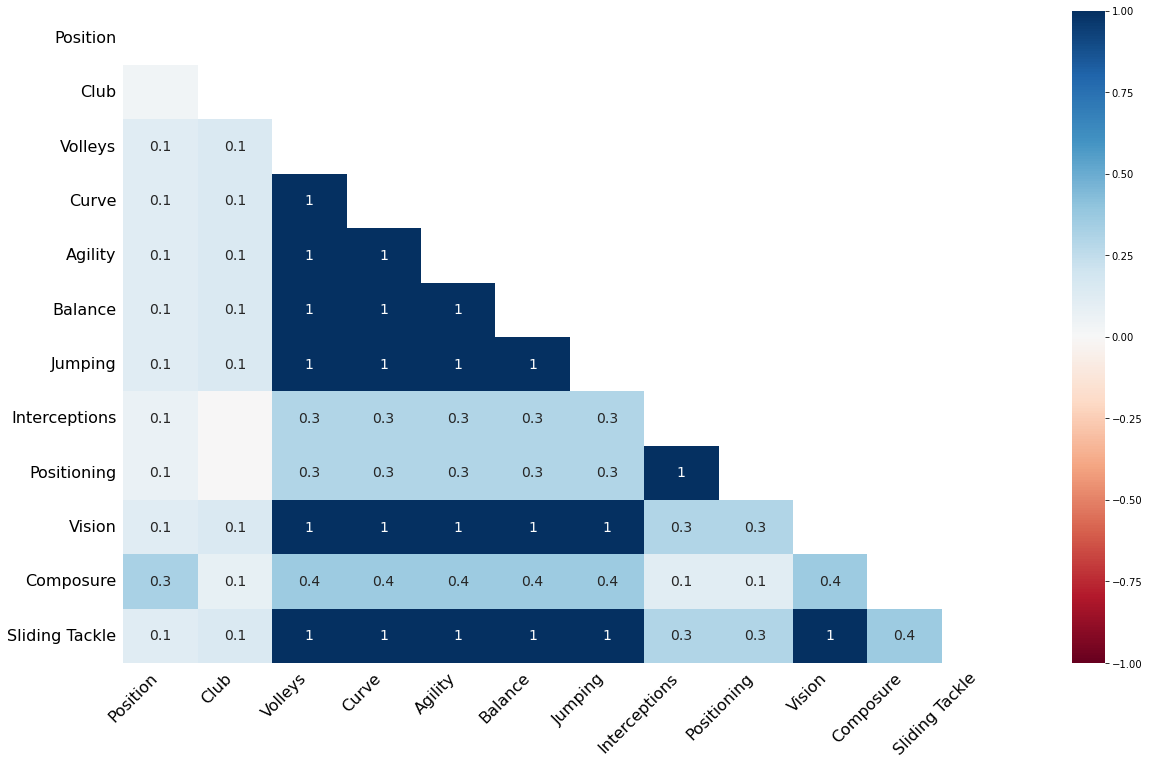

In [47]:
msno.heatmap(jugadores)

In [48]:
jugadores.Composure.value_counts()


65.0    645
58.0    599
60.0    594
62.0    588
64.0    585
68.0    566
66.0    562
70.0    529
59.0    521
63.0    516
55.0    512
67.0    502
57.0    470
69.0    457
56.0    441
61.0    436
72.0    404
54.0    367
71.0    361
52.0    356
50.0    348
53.0    344
74.0    338
73.0    309
49.0    303
75.0    292
51.0    283
48.0    274
76.0    233
47.0    219
46.0    207
45.0    206
78.0    171
77.0    156
80.0    152
44.0    151
43.0    143
42.0    133
41.0    112
79.0    103
82.0    100
81.0     96
40.0     86
39.0     73
84.0     57
83.0     56
38.0     45
37.0     38
85.0     28
86.0     28
36.0     24
87.0     17
35.0     13
88.0     12
90.0     10
34.0      8
89.0      5
92.0      4
91.0      3
31.0      3
33.0      2
94.0      2
93.0      2
32.0      2
96.0      1
25.0      1
95.0      1
30.0      1
Name: Composure, dtype: int64

In [49]:
jugadores.Position.value_counts()


CB               2047
ST               1818
CDM CM            748
LB                654
CM                650
CM CDM            602
RB                537
CDM               248
CAM CM            240
LM                233
CAM               229
CB RB             209
RM LM             201
RM                201
LM RM             200
CB CDM            197
CB LB             190
CM CAM            184
LB LM             172
RB LB             119
RW                109
RB CB             107
RB RM             106
LB LWB            106
CDM CB            100
LW                 94
RB RWB             94
LW RW              90
ST LW              89
LB CB              88
RW LW              87
ST LM              87
ST RW              85
ST RM              83
ST CAM             82
CM CDM CAM         81
CAM RM             76
CAM LM             69
RM RW              68
LM ST              66
RM ST              63
ST CF              61
CAM ST             56
LM LW              56
LM CAM             55
RM CAM    

# Entrega 20/12 - Data Storytelling

Con este trabajo principalmente queremos determinar, basandonos en el campo OVA, el cual resume todas las calificaciones del jugador en un solo número,
si un jugador se clasifica como Oro, Plata o Bronce, manera que tiene el juego Fifa de valorizar a los jugadores, 

Previamente a determinar que usaríamos la variable OVA, analizamos todos los campos con los que contabamos, 
luego de observar que otra variablas, no resultaban de interés para nuestra calificación las descartamos, como por ejemplo,
el nombre, la nacionalidad, el club, entre otras. 

Separando los datos entre jugadores y arqueros, fuimos llegando a la conclusión de que OVA, era el mas adecuado para nuestro fin. 
Para lograr la clasificación comenzamos respondiendo ciertas preguntas. 

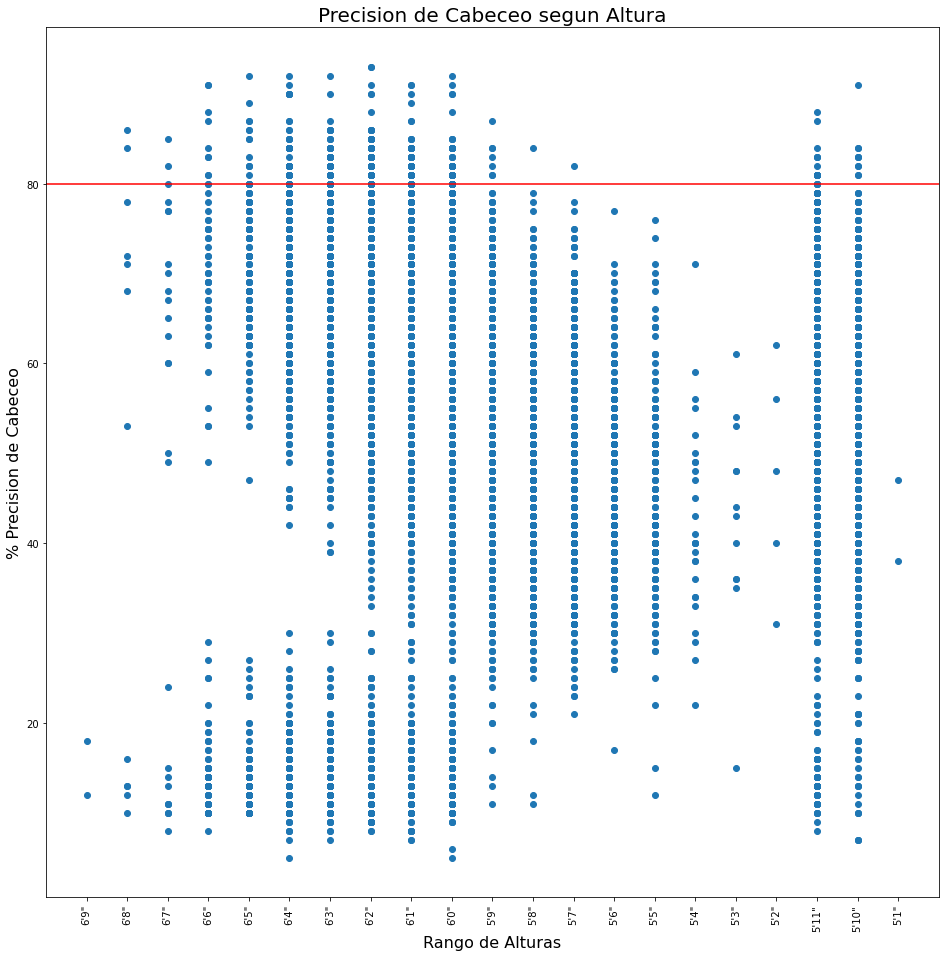

In [50]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(16,16))

# Dibujar puntos
ax.scatter(x = prec_Cabezazo['Height'] , y = prec_Cabezazo['Heading Accuracy'])
plt.xticks(rotation=90)
plt.axhline(y=80, xmin=0, xmax=1, c='red')

ax.set_title('Precision de Cabeceo segun Altura', fontsize=20)
ax.set_xlabel('Rango de Alturas', fontsize=16)
ax.set_ylabel('% Precision de Cabeceo', fontsize=16)



# Mostrar el gráfico
plt.show()

Como se puede observar, se da una mayor concentracion de jugadores con mejor precision de cabeceo en los rangos de altura entre ( 6' y 6'5" )

Continuamos analizando nuevas variables que nos permitirán llegar a la clasificación deseada.

# Análisis bivariado

La hipotesis del analisis bivariado realizado pertende demostrar que las habilidades de ataque y defensa son 2 elementos importantes de la valoracion OVA, dicho anlisis nos permitira observar en detalle caracteristicas importantes de cada tipo de jugador.


In [51]:
#Totalidad de registros por columnas
jugadores.count()

ID                  15608
Name                15608
Age                 15608
OVA                 15608
Nationality         15608
Position            15195
Club                15588
Height              15608
Weight              15608
foot                15608
Attacking           15608
Crossing            15608
Finishing           15608
Heading Accuracy    15608
Short Passing       15608
Volleys             15553
Skill               15608
Dribbling           15608
Curve               15553
FK Accuracy         15608
Long Passing        15608
Ball Control        15608
Movement            15608
Acceleration        15608
Sprint Speed        15608
Agility             15553
Reactions           15608
Balance             15553
Power               15608
Shot Power          15608
Jumping             15553
Stamina             15608
Strength            15608
Long Shots          15608
Mentality           15608
Aggression          15608
Interceptions       15603
Positioning         15603
Vision      

In [52]:
#Tipo de dato de cada columna
jugadores.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Position             object
Club                 object
Height               object
Weight               object
foot                 object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions             int64
Balance             float64
Power                 int64
Shot Power            int64
Jumping             float64
Stamina               int64
Strength              int64
Long Shots            int64
Mentality             int64
Aggression          

In [53]:
#Principales medidas estadisticas
jugadores.describe().T

count           mean           std    min       25%  \
ID                15608.0  219808.525115  37266.397849    2.0  204522.0   
Age               15608.0      25.174910      4.856184   16.0      21.0   
OVA               15608.0      67.005574      6.764179   38.0      63.0   
Attacking         15608.0     275.955664     47.702352   60.0     244.0   
Crossing          15608.0      55.277166     14.079935   11.0      46.0   
Finishing         15608.0      51.496925     16.413417    8.0      38.0   
Heading Accuracy  15608.0      57.427601     12.170249   10.0      49.0   
Short Passing     15608.0      63.695861      9.615193   11.0      58.0   
Volleys           15553.0      48.228059     15.033609    9.0      36.0   
Skill             15608.0     283.794144     55.647586   64.0     247.0   
Dribbling         15608.0      62.127947     12.183912    8.0      56.0   
Curve             15553.0      52.963351     15.192437    9.0      42.0   
FK Accuracy       15608.0      47.311443     15.387211    8.0      35.0   
Long Passing      15608.0      56.995579     12.407414   12.0      49.0   
Ball Control      15608.0      64.582458      9.871397   10.0      60.0   
Movement          15608.0     332.641402     44.868347  113.0     306.0   
Acceleration      15608.0      68.081945     12.036206   14.0      62.0   
Sprint Speed      15608.0      68.072078     11.767215   11.0      62.0   
Agility           15553.0      66.941940     12.325601   18.0      60.0   
Reactions         15608.0      63.131023      8.807384   24.0      57.0   
Balance           15553.0      66.886003     12.303614   21.0      60.0   
Power             15608.0     311.503203     40.845713  142.0     282.0   
Shot Power        15608.0      60.980395     13.179029   12.0      53.0   
Jumping           15553.0      65.801839     11.727408   22.0      59.0   
Stamina           15608.0      66.503460     11.682001   12.0      60.0   
Strength          15608.0      65.721105     12.702431   20.0      58.0   
Long Shots        15608.0      52.728280     15.821748    9.0      42.0   
Mentality         15608.0     276.466171     43.533764   76.0     245.0   
Aggression        15608.0      60.002691     14.494511   10.0      50.0   
Interceptions     15603.0      50.049606     19.329482    7.0      32.0   
Positioning       15603.0      56.411844     14.621542    7.0      49.0   
Vision            15553.0      57.011573     12.780510   12.0      49.0   
Penalties         15608.0      53.225461     12.853497   12.0      43.0   
Composure         15206.0      61.555965     10.240379   25.0      55.0   
Defending         15608.0     151.109303     55.725844   27.0      99.0   
Marking           15608.0      50.425167     18.155149    3.0      35.0   
Standing Tackle   15608.0      51.612314     19.489580    9.0      34.0   
Sliding Tackle    15553.0      49.245355     19.491698   10.0      31.0   
Total Stats       15608.0    1684.691632    200.324660  792.0    1543.0   

                       50%       75%       max  
ID                229359.5  244034.5  259105.0  
Age                   25.0      29.0      53.0  
OVA                   67.0      72.0      93.0  
Attacking            277.0     309.0     437.0  
Crossing              58.0      66.0      94.0  
Finishing             55.0      64.0      95.0  
Heading Accuracy      58.0      66.0      93.0  
Short Passing         64.0      70.0      94.0  
Volleys               49.0      60.0      90.0  
Skill                286.0     322.0     470.0  
Dribbling             64.0      70.0      96.0  
Curve                 54.0      65.0      94.0  
FK Accuracy           45.0      59.0      94.0  
Long Passing          59.0      66.0      93.0  
Ball Control          65.0      71.0      96.0  
Movement             337.0     363.0     464.0  
Acceleration          69.0      76.0      97.0  
Sprint Speed          69.0      76.0      96.0  
Agility               68.0      75.0      96.0  
Reactions             63.0      69.0   

<AxesSubplot:xlabel='Attacking', ylabel='Defending'>

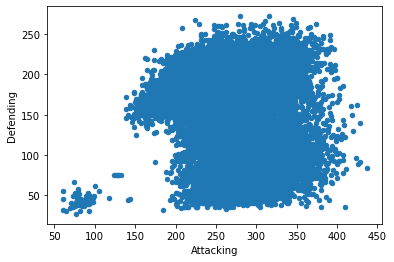

In [56]:
#Scatterplot
jugadores.plot.scatter(x='Attacking', y='Defending')

<AxesSubplot:xlabel='Attacking', ylabel='Defending'>

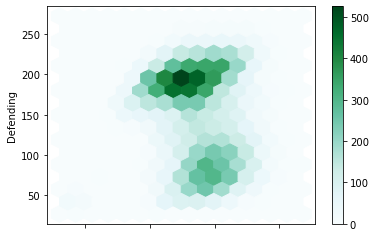

In [58]:
jugadores.plot.hexbin(x='Attacking', y='Defending', gridsize=15)

In [67]:
#Filtramos la data y realizamos una agrupacion
jugadores_stats = jugadores.groupby(['target','foot']).mean()[['Attacking', 'Defending']]
jugadores_stats

Attacking   Defending
target foot                         
bronce Left   241.532832  142.016416
       Right  242.347425  130.863946
oro    Left   329.594937  177.989150
       Right  329.251425  176.386954
plata  Left   286.448090  162.752693
       Right  285.077186  154.195014

<AxesSubplot:xlabel='target,foot'>

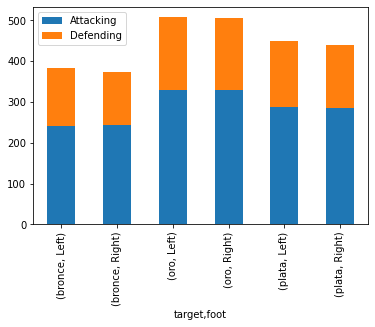

In [68]:
jugadores_stats.plot.bar(stacked=True)